## 머신러닝
# 2. 거리

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
x1 = np.array([2,5])
x2 = np.array([5,2])

In [27]:
distance = np.sqrt(np.sum((x1-x2)**2))
distance

4.242640687119285

In [28]:
distance = ((x1-x2)**2).sum()**0.5
distance

4.242640687119285

In [29]:
x3 = np.array([3,7])

In [7]:
X = np.array([[2,5], [5,2], [3,7]])
X

array([[2, 5],
       [5, 2],
       [3, 7]])

In [6]:
X = np.vstack([x1,x2,x3])
X

NameError: name 'x1' is not defined

In [8]:
distances = []

for a in X:
    l = []
    for b in X:
        d = ((a-b)**2).sum()**0.5 # 거리 구하는 공식
        l.append(d)
        
    distances.append(l)
        
distances = np.array(distances)
distances

array([[0.        , 4.24264069, 2.23606798],
       [4.24264069, 0.        , 5.38516481],
       [2.23606798, 5.38516481, 0.        ]])

In [9]:
### numpy 의 브로드캐스팅을 이용한 트릭
X2 = X.reshape(3,1,2)
((X2-X)**2).sum(axis=2)**0.5

array([[0.        , 4.24264069, 2.23606798],
       [4.24264069, 0.        , 5.38516481],
       [2.23606798, 5.38516481, 0.        ]])

(1.85, 5.15, 1.75, 7.25)

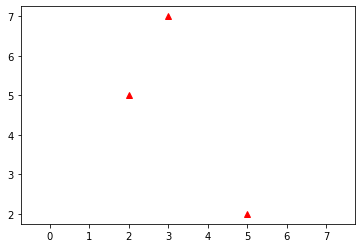

In [12]:
plt.plot(X[:,0], X[:,1], 'r^')
#plt.scatter(X[:,0], X[:,1], c='green')
plt.axis('equal')

(1.85, 5.15, 1.75, 7.25)

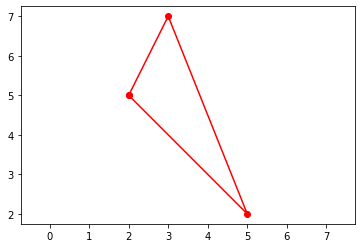

In [35]:
X3 = np.vstack([X,x1]) # 첫번째 샘플을 끝에 추가하면 닫힌 다각형을 그릴수 있다
plt.plot(X3[:,0], X3[:,1], 'ro-')
plt.axis('equal')

In [14]:
iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',', usecols=range(4))
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
iris.shape

(150, 4)

- 아래는 브로드캐스팅을 이용한 방법이다
- 여러분은 반복문을 사용해 거리를 구해보자

In [15]:
distances = []

for a in iris:
    l = []
    for b in iris:
        d = ((a-b)**2).sum()**0.5 # 거리 구하는 공식
        l.append(d)
        
    distances.append(l)
        
distances = np.array(distances)
distances

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

In [16]:
distances.shape

(150, 150)

In [39]:
distances = ((iris.reshape(150,1,4)-iris)**2).sum(axis=2)**0.5
distances.shape

(150, 150)

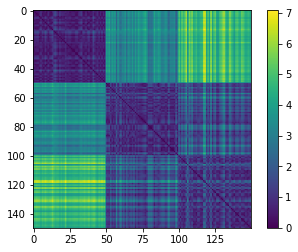

In [40]:
plt.imshow(distances)
plt.colorbar()

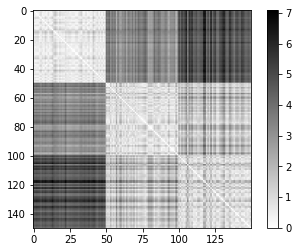

In [41]:
plt.imshow(distances, cmap='gray_r')
plt.colorbar()

In [43]:
d = np.sqrt(np.sum((iris-iris[0])**2, axis=1))
d.shape

(150,)

Text(0.5, 1.0, 'distances from iris[0] to others')

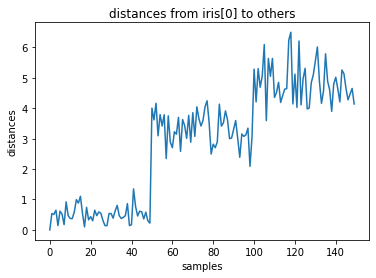

In [47]:
plt.plot(d)
plt.xlabel('samples')
plt.ylabel('distances')
plt.title('distances from iris[0] to others')

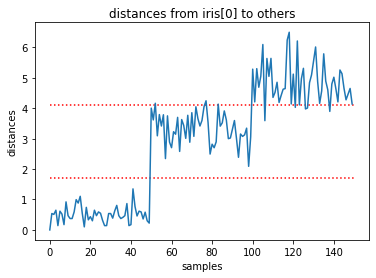

In [52]:
plt.plot(d)
plt.xlabel('samples')
plt.ylabel('distances')
plt.title('distances from iris[0] to others')

plt.hlines([1.7, 4.1], 0,150, linestyles=':', colors='r') # 눈 대중으로 구분선을 그림

- 위의 그래프가 가장 심플한 머신러닝 모델 중의 하나이다
- 첫번째 샘플과의 거리가 1.7 보다 작으면 setosa, 4.1보다 작으면 versicolor, 4.1보다 크면 virginica 로 판별하는 모델이다